In [1]:
import os
import glob
import pandas as pd
import datetime
import matplotlib.pyplot as plt


cameras = [
    ["CAM02009CCTV7.jpg", "I-80 Eastbound Exit 161 Bellefonte Interchange (I-80 & I-99)",40.944571,-77.720918],
    ["CAM02001CCTV2.jpg", "Port Matilda US-322 By-Pass Westbound",40.810961,-78.075259],
    ["CAM02010CCTV11.jpg", "Port Matilda I-99 Exit 61 Median",40.803880,-78.063664],
    ["CAM02005CCTV9.jpg", "Milesburg Interchange West I-80 Exit 158 Eastbound / Alt US-220",40.955477,-77.773749],
    ["CAM02006CCTV10.jpg", "Milesburg Interchange East I-80 Exit 158 Westbound / PA-150",40.956061,-77.766277],
    ["CAM02028CCTV32.jpg","Atherton and Valley Vista",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg","Atherton and Vairo",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg","Atherton and North Hills",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg","Atherton and Park",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg","Atherton and W.College",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg","Atherton and W.Beaver",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg","I-99/US-322 Interchange",40.828613,-77.840339],
    ["CAM02020CCTV24.jpg","Benner Pike",40.829048,-77.804817],
    ["CAM02002CCTV3.jpg","Grays Woods",40.817144,-77.939841],
    ["CAM02007CCTV13.jpg","US-322 E/O PA-26",40.795773,-77.820937],
    ["CAM02046CCTV52.jpg","I-99 at Exit 71 (Toftrees)",40.817953,-77.900271],
    ["CAM02033CCTV38.jpg","Snowshoe I-80 Exit 147",41.022703,-77.933981],
    ["collegeTwp.jpg","College Township Traffic camera",40.811564,-77.830719],
    ["parkArboretum.jpg","PSU Park Ave.",40.804483,-77.864219]
    ]

In [2]:
camdir = "cams48_csvs"

for c in cameras:
    x = glob.glob(f"/home/ubuntu/nitelite/{camdir}/*vehicles*{c[0].split('.')[0]}*.csv")
    k = pd.read_csv(x[0])
    for i in range(0,len(x)): # 1
        x2 = pd.read_csv(x[i])
        k = pd.concat([k,x2])
    k['time'] =  pd.to_datetime(k['time'])
    k.to_csv(f"xfull_vehicles_{camdir}_{c[0].split('.')[0]}.csv",index=False)

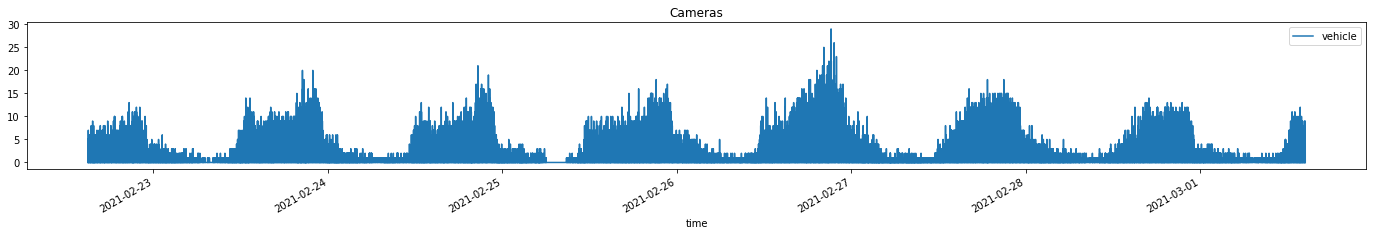

In [3]:

x = glob.glob(f"/home/ubuntu/nitelite/xfull_vehicles_{camdir}_*.csv")
k = pd.read_csv(x[0])
for i in range(0,len(x)): # 2
    x2 = pd.read_csv(x[i])
    k = pd.concat([k,x2])
k['time'] =  pd.to_datetime(k['time'])
k.to_csv(f"full_vehicles_{camdir}.csv",index=False)
ax = k.plot(x ='time', y='vehicle', kind = 'line',figsize=(24,3),title=f"Cameras")

In [4]:
k

,time,file,vehicle
0,2021-02-26 07:00:05,/home/ubuntu/cams48/CAM02006CCTV10/20210226/20...,0
1,2021-02-26 07:00:46,/home/ubuntu/cams48/CAM02006CCTV10/20210226/20...,0
2,2021-02-26 07:01:26,/home/ubuntu/cams48/CAM02006CCTV10/20210226/20...,0
3,2021-02-26 07:02:06,/home/ubuntu/cams48/CAM02006CCTV10/20210226/20...,0
4,2021-02-26 07:02:47,/home/ubuntu/cams48/CAM02006CCTV10/20210226/20...,0
...,...,...,...
13128,2021-02-27 01:57:14,/home/ubuntu/cams48/CAM02001CCTV2/20210227/202...,0
13129,2021-02-27 01:57:55,/home/ubuntu/cams48/CAM02001CCTV2/20210227/202...,0
13130,2021-02-27 01:58:35,/home/ubuntu/cams48/CAM02001CCTV2/20210227/202...,0
13131,2021-02-27 01:59:17,/home/ubuntu/cams48/CAM02001CCTV2/20210227/202...,0


In [5]:
dfcam = pd.read_csv(f"full_vehicles_{camdir}.csv")

dfcam['time'] =  pd.to_datetime(dfcam['time'])
dfcam = dfcam.sort_values(by='time')

dfcam = dfcam.rename(columns={"time": "datetime_UTC", "file": "image_file", "vehicle": "vehicle_count"})
dfcam['datetime_EST'] = pd.to_datetime(dfcam['datetime_UTC']) - pd.Timedelta(hours=4)

In [6]:
dfcam

,datetime_UTC,image_file,vehicle_count,datetime_EST
135950,2021-02-22 14:57:51,/home/ubuntu/cams48/collegeTwp/20210222/202102...,0,2021-02-22 10:57:51
125905,2021-02-22 14:57:54,/home/ubuntu/cams48/CAM02028CCTV32/20210222/20...,0,2021-02-22 10:57:54
65459,2021-02-22 14:57:56,/home/ubuntu/cams48/CAM02037CCTV43/20210222/20...,1,2021-02-22 10:57:56
80051,2021-02-22 14:57:59,/home/ubuntu/cams48/CAM02038CCTV44/20210222/20...,2,2021-02-22 10:57:59
172286,2021-02-22 14:58:01,/home/ubuntu/cams48/CAM02039CCTV45/20210222/20...,0,2021-02-22 10:58:01
...,...,...,...,...
69248,2021-03-01 14:29:53,/home/ubuntu/cams48/CAM02002CCTV3/20210301/202...,0,2021-03-01 10:29:53
195629,2021-03-01 14:29:55,/home/ubuntu/cams48/CAM02007CCTV13/20210301/20...,6,2021-03-01 10:29:55
110970,2021-03-01 14:29:57,/home/ubuntu/cams48/CAM02046CCTV52/20210301/20...,0,2021-03-01 10:29:57
41852,2021-03-01 14:29:59,/home/ubuntu/cams48/CAM02009CCTV7/20210301/202...,0,2021-03-01 10:29:59


In [7]:
dfcam.to_csv(f"dfull_vehicles_{camdir}_020821-030121-partial.csv",index=False)

In [8]:
#full = pd.read_csv("full_vehicles_427-1128-partial-all-cameras.csv")
full = pd.read_csv("full_vehicles_427-022221-partial-all-cameras.csv")
#full = pd.read_csv("all_traffic_cameras_426-601.csv")

In [9]:
full

,datetime_UTC,image_file,vehicle_count,datetime_EST
0,2020-04-27 00:00:02,/home/ubuntu/cams1/20200427_000002_CAM02033CCT...,0,2020-04-26 20:00:02
1,2020-04-27 00:00:05,/home/ubuntu/cams1/20200427_000005_collegeTwp.jpg,2,2020-04-26 20:00:05
2,2020-04-27 00:00:08,/home/ubuntu/cams1/20200427_000008_CAM02028CCT...,1,2020-04-26 20:00:08
3,2020-04-27 00:00:10,/home/ubuntu/cams1/20200427_000010_CAM02037CCT...,3,2020-04-26 20:00:10
4,2020-04-27 00:00:12,/home/ubuntu/cams1/20200427_000012_CAM02038CCT...,0,2020-04-26 20:00:12
...,...,...,...,...
11072864,2021-02-22 14:57:28,/home/ubuntu/cams47/CAM02001CCTV2/20210222/202...,0,2021-02-22 10:57:28
11072865,2021-02-22 14:57:32,/home/ubuntu/cams47/CAM02005CCTV9/20210222/202...,0,2021-02-22 10:57:32
11072866,2021-02-22 14:57:38,/home/ubuntu/cams47/collegeTwp/20210222/202102...,0,2021-02-22 10:57:38
11072867,2021-02-22 14:57:41,/home/ubuntu/cams47/CAM02028CCTV32/20210222/20...,0,2021-02-22 10:57:41


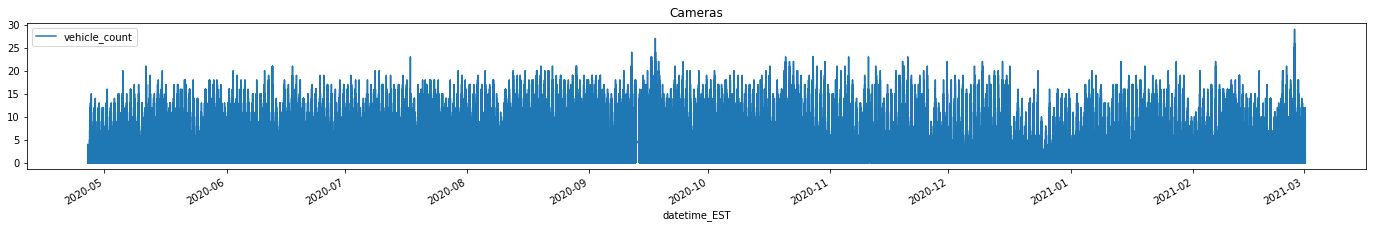

In [10]:
newfull = pd.concat([full,dfcam])
newfull['datetime_EST'] =  pd.to_datetime(newfull['datetime_EST'])
newfull = newfull.sort_values(by='datetime_EST')
ax = newfull.plot(x ='datetime_EST', y='vehicle_count', kind = 'line',figsize=(24,3),title=f"Cameras")

In [11]:
newfull.to_csv("full_vehicles_427-030121-partial-all-cameras.csv",index=False)

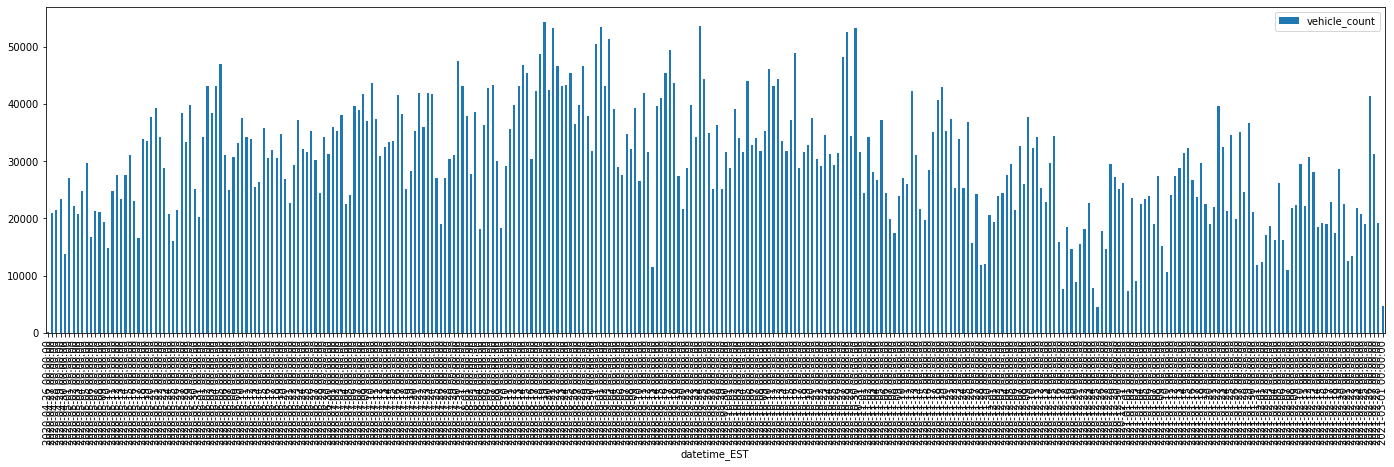

In [12]:
newfull.set_index('datetime_EST', drop=False, inplace=True)
newfull = newfull.set_index('datetime_EST').resample('D').sum().reset_index()
newfull.plot(x ='datetime_EST', y='vehicle_count', kind='bar',figsize=(24,6))
# this retains artificial bump on the benner pike